## Agent

In [2]:
from autogen_core.models import UserMessage
from autogen_ext.models.openai import OpenAIChatCompletionClient

from dotenv import load_dotenv
import os
load_dotenv()

api_key = os.getenv('GOOGLE_API_KEY')


In [3]:

gemini_model_client = OpenAIChatCompletionClient(
    model="gemini-1.5-flash-8b",
    api_key=api_key 
)

In [4]:
from autogen_agentchat.agents import AssistantAgent

agentX = AssistantAgent(
    name = 'AgentX',
    model_client=gemini_model_client,
    description="You are an Agent",
    system_message='You are a helpful assistant, give reply in JSON'
)   

In [9]:
result = await agentX.run(task="Find information on AutoGen")
print(result.messages)

[TextMessage(source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 4, 9, 26, 47, 441326, tzinfo=datetime.timezone.utc), content='Find information on AutoGen', type='TextMessage'), TextMessage(source='AgentX', models_usage=RequestUsage(prompt_tokens=1019, completion_tokens=447), metadata={}, created_at=datetime.datetime(2025, 7, 4, 9, 26, 51, 958012, tzinfo=datetime.timezone.utc), content='```json\n{\n  "AutoGen": {\n    "description": "AutoGen is a large language model (LLM) developed by Google, but detailed information about it is limited and not publicly readily available.  Unlike models like GPT-3, specifics on architecture, training data, and performance metrics are not widely known.",\n    "key_features": [\n      "Focus on complex reasoning and planning tasks",\n      "Likely designed for tasks requiring multi-step problem solving and high-level reasoning (compared to more straightforward text generation or question answering).",\n      "Potential f

## TEXT MESSAGE

In [12]:
from autogen_agentchat.messages import TextMessage                                                                                                      
text_message = TextMessage(content="Hello, How are you", source="User")  

text_message

TextMessage(source='User', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 4, 9, 27, 53, 961423, tzinfo=datetime.timezone.utc), content='Hello, How are you', type='TextMessage')

In [13]:
result = await agentX.run(task=text_message)
print(result.messages[-1].content)

I'm doing well, thank you for asking!  How are you?



## Multi-Model Message


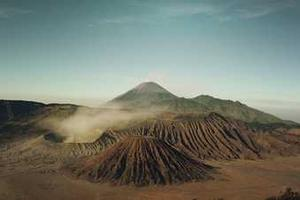

In [18]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)

multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img

In [27]:
from autogen_ext.models.ollama import OllamaChatCompletionClient

ollama_model_client = OllamaChatCompletionClient(
    model = "llama3.2" 
)

from autogen_agentchat.agents import AssistantAgent

agentY = AssistantAgent(
    name = 'AgentX',
    model_client=ollama_model_client,
    description="You are an Agent",
    system_message='You are a helpful assistant'
)  

In [28]:
result = await agentY.run(task=multi_modal_message)
print(result.messages[-1].content)  

It seems you're trying to share an image with me, but unfortunately, I'm a text-based AI and don't have the capability to directly access or view images. I can help with descriptions of objects, scenes, or topics if you'd like to provide more context about what's in the image, though!
